In [1]:
## Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Dataset

# Hint -> Use the .read_csv() function

data = pd.read_csv('StudentsPerformance.csv')

In [3]:
# Check the Shape of the Dataset

# Hint -> Use the .shape attribute

data.shape

(1000, 8)

In [4]:
# Check the column names of the Dataset

# Hint -> Use the .columns attribute

data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
# Check the Head of the Dataset

# Hint -> Use the .head() function

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Check the Tail of the Dataset

# Hint -> Use the .tail() function

data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
# Check the Sample of the Dataset

# Hint -> Use the .sample() function

data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
660,male,group C,some college,free/reduced,none,74,77,73


In [8]:
# Check the Data Types of the columns in the Dataset

# Hint -> Use the .info() function

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Check the No. of Missing Values in each of the columns of the Dataset

# Hint -> Use the isnull().sum() function

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# Check the Descriptive Statistcs for the Dataset

# Hint -> Use the .describe() function

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# Check the Statistics for the Categorical columns in the dataset

# Hint -> Use .describe() function and specify include = 'onject'

data.describe(include = 'object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


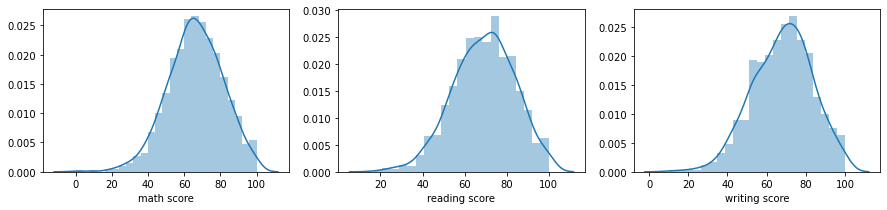

In [12]:
# Check the Distribution of the Target Column ( Math Score, Reading Score, and Writing Score)

# Hint -> Use sns.distplot() function

plt.rcParams['figure.figsize'] = (15, 3)

plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.show()

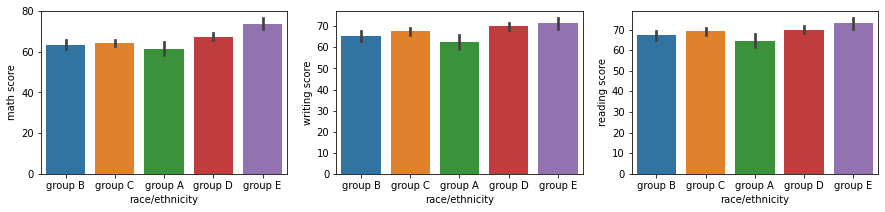

In [13]:
# Check the Relation of Race with respect to Math Score, Reading Score, and Writing Score

# Hint -> Use sns.barplot() function one by one to get all the results.

plt.rcParams['figure.figsize'] = (15, 3)

plt.subplot(1, 3, 1)
sns.barplot(data['race/ethnicity'], data['math score'])

plt.subplot(1, 3, 2)
sns.barplot(data['race/ethnicity'], data['writing score'])

plt.subplot(1, 3, 3)
sns.barplot(data['race/ethnicity'], data['reading score'])

plt.show()

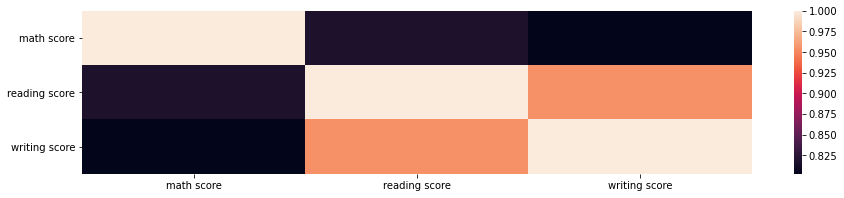

In [14]:
# Plot a Heatmap for the dataset

# Hint -> Use the sns.heatmap() function

sns.heatmap(data.corr())

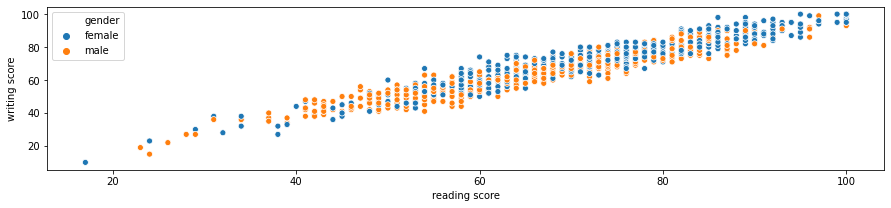

In [15]:
# plot a Bubble Chart 

# Hint -> Take x axis as Reading Score, Y axis as Writing Score, and hue as Gender

sns.scatterplot(data['reading score'], data['writing score'], hue = data['gender'])

In [16]:
# Take out the Groupby of Gender wrt Reading, Writing, and Math Score

# Hint -> Use .groupby() function and then use .agg() function with mean

data[['gender', 'reading score', 'writing score', 'math score']].groupby(['gender']).agg('mean')

,reading score,writing score,math score
gender,,,
female,72.608108,72.467181,63.633205
male,65.473029,63.311203,68.728216


In [17]:
# Make New Features such as Total Score, Percentage of Marks, and Grade

# Hint -> Aggregate the Reading, Writing, and Maths Marks to get Total Marks
# Hint -> Divide the Total Marks with the number of Subjects

data['Total Marks'] = data['reading score'] + data['math score'] + data['writing score']
data['percentage'] = data['Total Marks']/3

In [28]:
def getgrade(percentage):
    if(percentage >= 90):
        return 'O'
    if(percentage >= 80):
        return 'A'
    if(percentage >= 70):
        return 'B'
    if(percentage >= 60):
        return 'C'
    if(percentage >= 40):
        return 'D'
    else :
        return 'E'


data['Grades'] = data['percentage'].apply(getgrade)


In [29]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,percentage,Grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [30]:
# lets check the columns after feature engineering
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Marks', 'percentage', 'Grades'],
      dtype='object')

In [32]:
# Apply Label Encoder on the Categorical Columns

# Hint -> Use Sklearn.preprocessing to import LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['Grades'] = le.fit_transform(data['Grades'])

In [33]:
# lets check if there is any categorical column left or not
data.select_dtypes('object').columns

Index([], dtype='object')

In [34]:
# Split the Target Column from the Data

# Hint -> Just Separate the Percentage from the data and store it in another variable

y = data['Grades']
x = data.drop(['Grades'], axis = 1)

print(x.shape)
print(y.shape)

(1000, 10)
(1000,)


In [35]:
# Split the Data into Train and Test sets

# Hint -> Use sklearn.model_selection to import train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


In [36]:
# Apply Feature Scaling on the Dataset

# Hint -> Use sklearn.preprocessing to import StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Day 4 Homework

In [ ]:
# Apply Logistic Regression 

# Hint -> Use Sklearn.linear_model to import logistic Regression


In [ ]:
# Check the Confusion Matrix

# Hint -> Use sklearn.metrics to import confusion matrix


In [ ]:
# Apply the Decision Trees

# Hint -> Use sklearn.tree to import Decision Tree


In [ ]:
# Check the Confusion Matrix

# Hint -> Use sklearn.metrics to import confusion matrix
